In [1]:
%load_ext autoreload
%autoreload 2
!hostname
!pwd
import os, sys
print(sys.executable)
# os.environ['CUDA_VISIBLE_DEVICES'] = "7"
# os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = "false"
sys.path.append(os.path.abspath("corewar"))

dhcp-10-29-255-160.dyn.MIT.EDU
/Users/akarshkumar0101/llm-corewar/corewar
/Users/akarshkumar0101/miniconda3/bin/python


In [2]:
import redcode
from core import Core
from mars import MARS

from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import numpy as np

import tyro
from dataclasses import dataclass

In [3]:
@dataclass
class Args:
    warriors: list[str] # List of warrior redcode filenames
    rounds: int = 1 # Rounds to play
    paused: bool | None = False # Start each round paused
    size: int = 8000 # The core size
    cycles: int = 80000 # Cycles until tie
    processes: int = 8000 # Max processes
    length: int = 100 # Max warrior length
    distance: int = 100 # Minimum warrior distance
# args = tyro.cli(Args)
args = Args(warriors=[f"warriors/{file}" for file in os.listdir("warriors")])

# args = Args(warriors=["warriors/validate.red", "warriors/validate.red", "warriors/validate.red", "warriors/validate.red"])

environment = {'ROUNDS': args.rounds,
               'CORESIZE': args.size,
               'CYCLES': args.cycles,
               'MAXPROCESSES': args.processes,
               'MAXLENGTH': args.length,
               'MINDISTANCE': args.distance}

warriors = []
for file in args.warriors:
    with open(file, encoding="utf-8", errors="replace") as f:
        a = f.readlines()
    warrior = redcode.parse(a, environment)
    warriors.append(warrior)

In [5]:
import random
random.seed(0)

a = []
for r in tqdm(range(100)):
    simulation = MARS(warriors=warriors, minimum_separation=args.distance, max_processes=args.processes, randomize=True)
    warrior2score = {warrior: 0 for warrior in warriors}
    for t in range(args.cycles):
        simulation.step()

        alive_flags = [int(len(warrior.task_queue)>0) for warrior in simulation.warriors]
        n_alive = sum(alive_flags)
        if n_alive==0:
            break
        for warrior, af in zip(simulation.warriors, alive_flags):
            warrior2score[warrior] += af * (1./n_alive)
    a.append(warrior2score)

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [9]:
def run_round_old(args, warriors, seed):
    random.seed(seed)
    simulation = MARS(warriors=warriors, minimum_separation=args.distance, max_processes=args.processes, randomize=True)
    warrior2score = {warrior: 0 for warrior in warriors}
    for t in range(args.cycles):
        simulation.step()

        alive_flags = [int(len(warrior.task_queue)>0) for warrior in simulation.warriors]
        n_alive = sum(alive_flags)
        if n_alive==0:
            break
        for warrior, af in zip(simulation.warriors, alive_flags):
            warrior2score[warrior] += af * (1./n_alive)
    return warrior2score


for seed in tqdm(range(10)):
    run_round_old(args, warriors, seed)
for seed in tqdm(range(10)):
    run_round(args, warriors, seed)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [16]:
def run_round(args, warriors, seed):
    random.seed(seed)
    simulation = MARS(warriors=warriors, minimum_separation=args.distance, max_processes=args.processes, randomize=True)
    scores = np.zeros(len(warriors))
    for t in range(args.cycles):
        simulation.step()

        alive_flags = np.array([len(warrior.task_queue)>0 for warrior in simulation.warriors]).astype(int)
        n_alive = sum(alive_flags)
        if n_alive==0:
            break
        scores += (alive_flags * (1./n_alive))
    return scores


scores = []
for seed in tqdm(range(100)):
    scores.append(run_round(args, warriors, seed))
scores = np.array(scores)

  0%|          | 0/100 [00:00<?, ?it/s]

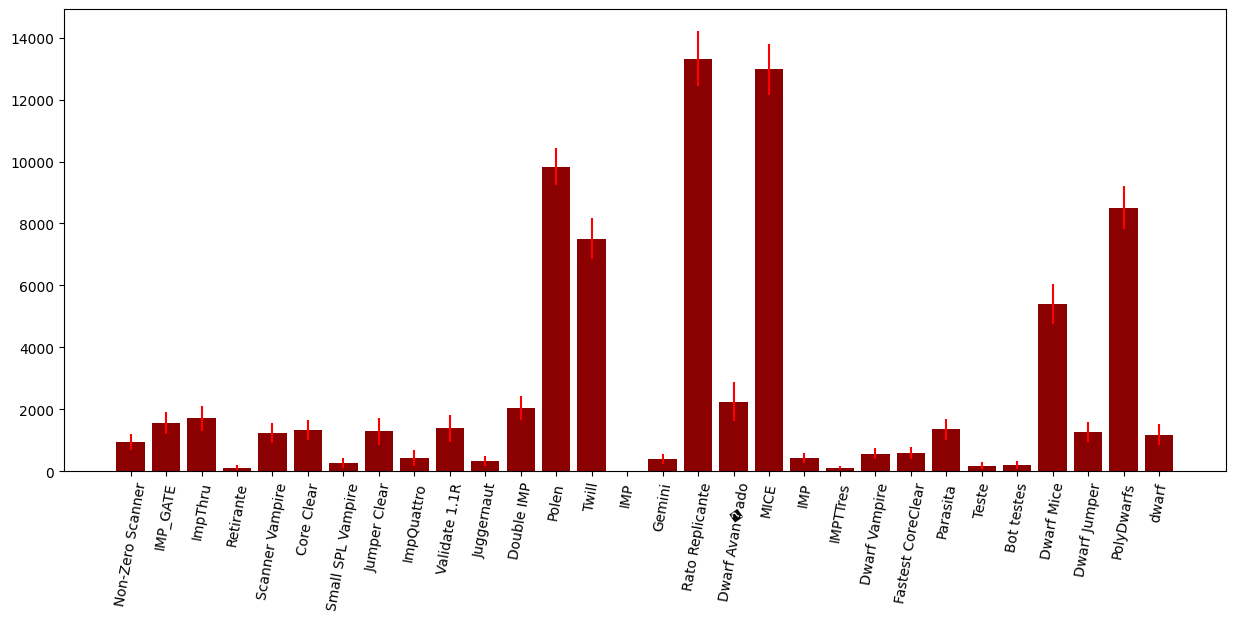

In [18]:
mean = scores.mean(axis=0)
std = scores.std(axis=0)
stderr = std/np.sqrt(scores.shape[0])

plt.figure(figsize=(15, 6))
plt.bar(np.arange(len(warriors)), mean, color='darkred')
plt.errorbar(np.arange(len(warriors)), mean, yerr=stderr, fmt='none', color='red')

plt.xticks(np.arange(len(warriors)), [warrior.name for warrior in warriors], rotation=80)
plt.show()

In [3]:
warriors = []
# with open("warriors/imp.red") as f:
    # warriors.append(redcode.parse(f.readlines()))
# with open("warriors/dwarf.red") as f:
    # warriors.append(redcode.parse(f.readlines()))
environment = {"MAXLENGTH": 1000}
with open("warriors/validate.red") as f:
    warrior = redcode.parse(f.readlines(), environment)
    warriors.append(warrior)
with open("warriors/validate.red") as f:
    warrior = redcode.parse(f.readlines(), environment)
    warriors.append(warrior)
with open("warriors/validate.red") as f:
    warrior = redcode.parse(f.readlines(), environment)
    warriors.append(warrior)
with open("warriors/validate.red") as f:
    warrior = redcode.parse(f.readlines(), environment)
    warriors.append(warrior)

In [4]:
warriors = []
for file in os.listdir("warriors"):
    with open(f"warriors/{file}", encoding="utf-8", errors="replace") as f:
        # print(f.readlines())
        try:
            warrior = redcode.parse(f.readlines(), environment)
            warriors.append(warrior)
        except Exception as e:
            print(file)
            print(e)


bot.red
leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<string>, line 1)


In [5]:
simulation = MARS(warriors=warriors, minimum_separation=100, max_processes=8000, randomize=True)

In [6]:
print([warrior.task_queue for warrior in warriors])
for i in tqdm(range(80000)):
    simulation.step()
print([warrior.task_queue for warrior in warriors])

[[7], [370], [617], [1004], [1263], [1601], [1713], [2072], [2439], [2633], [2916], [3268], [3464], [3790], [4044], [4394], [4569], [4917], [5291], [5461], [5729], [6091], [6323], [6659], [6998], [7223], [7508], [7767]]


  1%|          | 521/80000 [00:00<00:15, 5209.19it/s]

100%|██████████| 80000/80000 [00:07<00:00, 10002.52it/s]

[[], [1016, 1012, 6057, 6213, 5965], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [6323, 6324, 6323, 6324, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 6324, 6324, 6323, 6324, 6323, 

In [ ]:
'hello'

In [ ]:
environment = {'CORESIZE': args.size,
                'CYCLES': args.cycles,
                'ROUNDS': args.rounds,
                'MAXPROCESSES': args.processes,
                'MAXLENGTH': args.length,
                'MINDISTANCE': args.distance}

# assemble warriors
warriors = [redcode.parse(file, environment) for file in args.warriors]

ValueError: Error at line 0: expected instruction in expression: "w"

In [164]:
warriors = []
with open(f"warriors/ak_test.red", encoding="utf-8", errors="replace") as f:
    warrior = redcode.parse(f.readlines(), environment)
    warriors.append(warrior)
simulation = MARS(warriors=warriors, minimum_separation=100, max_processes=8000, randomize=False)

def print_core(simulation, start=0, end=5):
    print("--------------------------------------------------")
    pc = simulation.warriors[0].task_queue[0]
    for i in range(start, end):
        print(f"{i-pc: 3d}", end=": ")
        if simulation.core[i]!=simulation.core[-1]:
            print(simulation.core[i], end="")
        else:
            print("o", end="")
        if i==pc:
            print("  <----pc")
        else:
            print(" ")
    print("--------------------------------------------------")

print_core(simulation)
for i in range(1):
    simulation.step()
    print_core(simulation)

--------------------------------------------------
  0: ADD.A  *     3, @     3  <----pc
  1: DAT.F  $    34, #     1 
  2: DAT.F  $     1, #     1 
  3: DAT.F  $    -2, #    -1 
  4: o 
--------------------------------------------------
--------------------------------------------------
 -1: ADD.A  *     3, @     3 
  0: DAT.F  $    34, #     1  <----pc
  1: DAT.F  $    35, #     1 
  2: DAT.F  $    -2, #    -1 
  3: o 
--------------------------------------------------


In [23]:
import redcode
environment = {'CORESIZE': 8000,
                'CYCLES': 1000000,
                'ROUNDS': 1000000,
                'MAXPROCESSES': 1000000,
                'MAXLENGTH': 1000000,
                'MINDISTANCE': 1000000}
for file in os.listdir("warriors"):
    with open(f"warriors/{file}", encoding="utf-8", errors="replace") as f:
        a = f.readlines()
    redcode.parse(a, environment)
    print(a)

ModuleNotFoundError: No module named 'redcode'

In [56]:
with open("prompt.txt", "r") as f:
    prompt = f.read()

In [110]:
from openai import OpenAI
client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-4.1",
    messages=[
        {
            "role": "user",
            "content": f"{prompt}\n\n\nWrite a valid corewar program in recode in between ``` tags. Only write the code (with comments explaining what it does), no other text."
        }
    ],
    n=16,
)

In [122]:
chatgpt_warriors = []
for choice in completion.choices:
    warrior = choice.message.content
    try:
        warrior = redcode.parse(warrior.split('```')[1].split("\n"), environment)
        chatgpt_warriors.append(warrior)
    except Exception as e:
        print('failed')
        # print(e)
        # print(warrior)

failed
failed
failed
failed


In [123]:
chatgpt_warriors

[<Warrior name=Imp Spiral 12 instructions>,
 <Warrior name=Imp 2 instructions>,
 <Warrior name=Imp Spiral 6 instructions>,
 <Warrior name=Stone 5 instructions>,
 <Warrior name=Imp Spiral 13 instructions>,
 <Warrior name=Imp 2 instructions>,
 <Warrior name=Imp Spiral 7 instructions>,
 <Warrior name=Imp Spiral 10 instructions>,
 <Warrior name=Imp 2 instructions>,
 <Warrior name=Imp 2 instructions>,
 <Warrior name=Imp Spiral 7 instructions>,
 <Warrior name=Imp Spiral 10 instructions>]

In [127]:
import pickle
def save_pkl(save_dir, name, item):
    if save_dir is not None:
        os.makedirs(f"{save_dir}/", exist_ok=True)
        with open(f"{save_dir}/{name}.pkl", "wb") as f:
            pickle.dump(item, f)


def load_pkl(load_dir, name):
    if load_dir is not None:
        with open(f"{load_dir}/{name}.pkl", "rb") as f:
            return pickle.load(f)
    else:
        return None

for i, warrior in enumerate(chatgpt_warriors):
    save_pkl("warriors", f"gpt_{i}", warrior)

In [128]:
chatgpt_warriors[0]

<Warrior name=Imp Spiral 12 instructions>

In [ ]:
python llm_evolve.py --warriors warriors/*.red --rounds=16 --gpt_warrior gpt_0 --save_dir="scores/0"
python llm_evolve.py --warriors warriors/*.red --rounds=16 --gpt_warrior gpt_1 --save_dir="scores/1"
python llm_evolve.py --warriors warriors/*.red --rounds=16 --gpt_warrior gpt_2 --save_dir="scores/2"
python llm_evolve.py --warriors warriors/*.red --rounds=16 --gpt_warrior gpt_3 --save_dir="scores/3"
python llm_evolve.py --warriors warriors/*.red --rounds=16 --gpt_warrior gpt_4 --save_dir="scores/4"
python llm_evolve.py --warriors warriors/*.red --rounds=16 --gpt_warrior gpt_5 --save_dir="scores/5"
python llm_evolve.py --warriors warriors/*.red --rounds=16 --gpt_warrior gpt_6 --save_dir="scores/6"
python llm_evolve.py --warriors warriors/*.red --rounds=16 --gpt_warrior gpt_7 --save_dir="scores/7"
python llm_evolve.py --warriors warriors/*.red --rounds=16 --gpt_warrior gpt_8 --save_dir="scores/8"
python llm_evolve.py --warriors warriors/*.red --rounds=16 --gpt_warrior gpt_9 --save_dir="scores/9"
python llm_evolve.py --warriors warriors/*.red --rounds=16 --gpt_warrior gpt_10 --save_dir="scores/10"
python llm_evolve.py --warriors warriors/*.red --rounds=16 --gpt_warrior gpt_11 --save_dir="scores/11"


In [140]:
a = []
for i in range(12):
    scores = load_pkl(f"scores/{i}", "scores")
    nw = scores.shape[1]
    print(scores.shape, scores.mean())
    mean = scores.mean(axis=0)
    std = scores.std(axis=0)
    stderr = std/np.sqrt(scores.shape[0])
    a.append((mean[-1], stderr[-1]))
    # plt.figure(figsize=(15, 6))
    # plt.bar(np.arange(nw), mean, color='darkred')
    # plt.errorbar(np.arange(nw), mean, yerr=stderr, fmt='none', color='red')
    # # plt.xticks(np.arange(nw), [warrior.name for warrior in warriors], rotation=80)
    # plt.show()
a = np.array(a)

(16, 31) 2580.6451612886462
(16, 31) 2177.862903224743
(16, 31) 2301.052419354171
(16, 31) 2580.6451612890864
(16, 31) 2580.6451612893284
(16, 31) 2177.862903224743
(16, 31) 2440.8487903225587
(16, 31) 2580.645161288896
(16, 31) 2177.862903224743
(16, 31) 2177.862903224743
(16, 31) 2580.6451612890737
(16, 31) 2161.546370967194


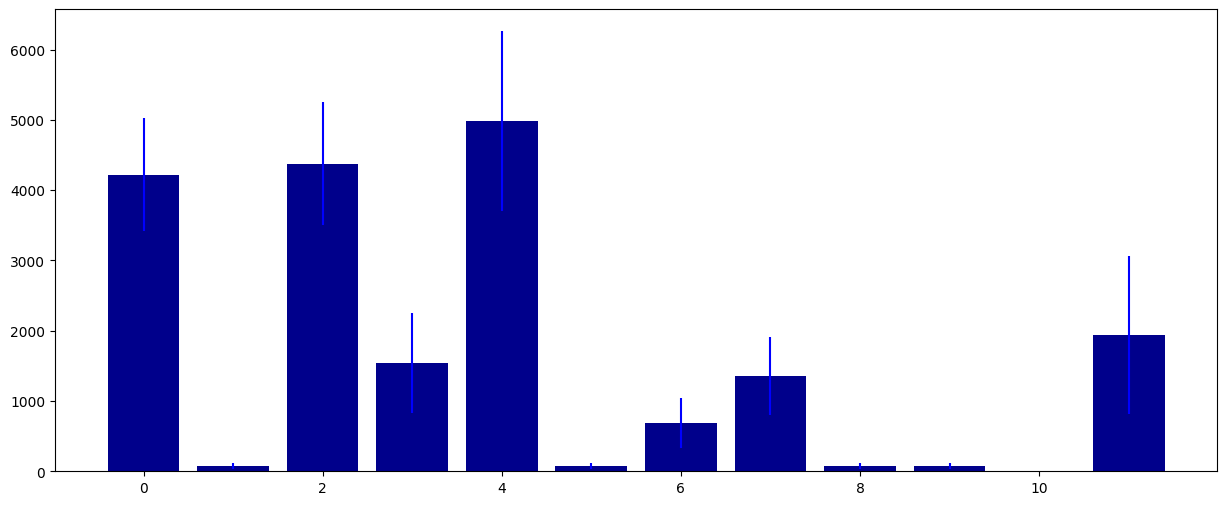

In [144]:
mean = a[:, 0]
stderr = a[:, 1]
plt.figure(figsize=(15, 6))
plt.bar(np.arange(len(mean)), mean, color='darkblue')
plt.errorbar(np.arange(len(mean)), mean, yerr=stderr, fmt='none', color='blue')
plt.show()
